In [1]:
# Import packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from os import listdir
import cv2
import math
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from collections import Counter
from tqdm import tqdm

### The data is stored inside the 'team' directory

In [2]:
path = '../../team/courses/MSiA400/GrandTeton'

In [3]:
path_real = path + '/Photos-20191017T195907Z-001/Photos/'
path_generated_go = path + '/GO_noGO Data Set_Images/TestGo/'
path_generated_nogo = path + '/GO_noGO Data Set_Images/TestNoGo/'

# Set path for training images
filepaths_go = [f for f in listdir(path_generated_go) if f.endswith('.png')]
filepaths_nogo = [f for f in listdir(path_generated_nogo) if f.endswith('.png')]

In [4]:
# Read all real images into a list
filepaths_real = [f for f in listdir(path_real) if f.endswith('.jpg')]
list_img_real = []
for i in tqdm(filepaths_real):
    list_img_real.append(cv2.imread(path_real + i))

100%|██████████| 192/192 [00:41<00:00,  4.58it/s]


In [5]:
n = len(list_img_real)
n

192

### Feature Extraction class

In [9]:
from Feature_Extractor_real import Feature_Extractor
## extracts 9 features from input image using opencv and other classical computer vision packages

### Processing feature vectors for all the images

In [10]:
feature_extractor = Feature_Extractorl()

In [11]:
# Create a list called 'levels' to store number of floors for each building
levels = []
for i in tqdm(range(n)):
    n_level = feature_extractor.count_level(list_img_real[i])
    levels.append(n_level)

100%|██████████| 192/192 [38:12<00:00, 11.94s/it]


In [12]:
Counter(levels)

Counter({3: 5, 1: 98, 2: 87, 4: 2})

In [13]:
# Create a list called 'openings' to store number of openings
openings = []
for i in tqdm(range(n)):
    openings.append(feature_extractor.count_openings(list_img_real[i]))

100%|██████████| 192/192 [30:06<00:00,  9.41s/it]


In [14]:
Counter(openings)

Counter({8: 14,
         2: 15,
         0: 5,
         5: 26,
         6: 26,
         1: 10,
         10: 8,
         7: 16,
         3: 23,
         9: 10,
         4: 32,
         12: 1,
         13: 2,
         11: 2,
         17: 1,
         14: 1})

In [15]:
# Create a list called 'fraction_widths' to store proportion of sum of all windows' widths (without overlap), (on all floors) 
# to the overall width of building
fraction_widths = []
for i in tqdm(range(len(list_img_real))):
    fraction_widths.append(feature_extractor.fraction_width(list_img_real[i]))

100%|██████████| 192/192 [29:21<00:00,  9.18s/it]


In [16]:
# Create a list called 'avg_fraction_widths' to store proportion of average of all windows' widths (over all floors) 
# to the overall width of building
avg_fraction_widths = []
for i in tqdm(range(len(list_img_real))):
    avg_fraction_widths.append(feature_extractor.avg_fraction_width(list_img_real[i]))

100%|██████████| 192/192 [1:04:23<00:00, 20.12s/it]


In [16]:
# Create a list called 'fraction_heights' to store proportion of sum of all windows' heights (without overlap), on all floors 
# to the overall height of building
fraction_heights = []
for i in tqdm(range(len(list_img_real))):
    fraction_heights.append(feature_extractor.fraction_height(list_img_real[i]))

100%|██████████| 8371/8371 [00:06<00:00, 1216.93it/s]


In [17]:
# Create a list called 'aggregate_fraction_heights' to store proportion of sum of all windows' heights (on all floors) 
# to the overall height of building
aggregate_fraction_heights = []
for i in tqdm(range(len(list_img_real))):
    aggregate_fraction_heights.append(feature_extractor.aggregate_fraction_height(list_img_real[i]))

100%|██████████| 8371/8371 [00:06<00:00, 1299.62it/s]


In [18]:
# Create a list called 'img_widths' to store the pixel widths of all images
img_widths = []
for i in tqdm(range(len(list_img_real))):
    img_widths.append(feature_extractor.img_width(list_img_real[i]))

100%|██████████| 8371/8371 [00:00<00:00, 1132122.62it/s]


In [19]:
# Create a list called 'img_heights' to store the pixel widths of all images
img_heights = []
for i in tqdm(range(len(list_img_real))):
    img_heights.append(feature_extractor.img_height(list_img_real[i]))

100%|██████████| 8371/8371 [00:00<00:00, 1151579.87it/s]


In [ ]:
# Create a list called 'img_heights' to store the pixel widths of all images
fraction_areas = []
for i in tqdm(range(len(list_img_real))):
    fraction_areas.append(feature_extractor.fraction_area(list_img_real[i]))

 88%|████████▊ | 168/192 [25:48<03:35,  8.97s/it]

In [23]:
# Create a a dataframe with all features and image index as columns
dic = {"filename":filepaths_real, "levels":levels, "openings":openings, "fraction_areas":fraction_areas, "fraction_widths":fraction_widths, 
       "avg_fraction_widths":avg_fraction_widths, "fraction_heights":fraction_heights, 
       "aggregate_fraction_heights":aggregate_fraction_heights, "img_widths":img_widths, "img_heights":img_heights}
df = pd.DataFrame(dic)

NameError: name 'fraction_areas' is not defined

In [25]:
df.head()

,filename,levels,openings,fraction_areas,fraction_widths,avg_fraction_widths,fraction_heights,aggregate_fraction_heights,img_widths,img_heights
0,1007,1,1.0,0.028925,0.096045,0.096045,0.407767,0.407767,531,206
1,1008,1,1.0,0.027588,0.105461,0.105461,0.432990,0.432990,531,194
2,1011,1,2.0,0.028925,0.167608,0.167608,0.461165,0.665049,531,206
3,1016,3,4.0,0.033021,0.269492,0.089831,0.336927,0.412399,590,371
4,1026,2,2.0,0.034910,0.133710,0.097928,0.410494,0.410494,531,324


In [26]:
# Add GO/NoGo column to label each image
df['Go/NoGo']=df['filename'].apply(lambda x: 1 if x in files_go_idx else 0)

In [27]:
df.head()

,filename,levels,openings,fraction_areas,fraction_widths,avg_fraction_widths,fraction_heights,aggregate_fraction_heights,img_widths,img_heights,Go/NoGo
0,1007,1,1.0,0.028925,0.096045,0.096045,0.407767,0.407767,531,206,1
1,1008,1,1.0,0.027588,0.105461,0.105461,0.432990,0.432990,531,194,1
2,1011,1,2.0,0.028925,0.167608,0.167608,0.461165,0.665049,531,206,1
3,1016,3,4.0,0.033021,0.269492,0.089831,0.336927,0.412399,590,371,1
4,1026,2,2.0,0.034910,0.133710,0.097928,0.410494,0.410494,531,324,1


### Fitting in logistic model and evaluate the performance(accuracy)

In [28]:
.12*8371

1004.52

In [29]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc [:, 1:10] , df['Go/NoGo'], test_size=0.12, random_state=0)

In [30]:
## normalizing the feature vectors
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = pd.DataFrame(scaler.transform(X_train))
X_test_scaled = pd.DataFrame(scaler.transform(X_test))

In [31]:
## hyperparameter tuning
logreg = LogisticRegression(solver = 'liblinear', class_weight = 'balanced')
# balanced weights for class imbalance
penalty = ['l1', 'l2']
C =np.logspace(-2, 4, 10)
hyperparameters = dict(C=C, penalty=penalty)

In [32]:
# Create grid search using 5-fold cross validation
clf = GridSearchCV(logreg, hyperparameters, cv=5, verbose=0)

In [33]:
best_model = clf.fit(X_train_scaled, y_train)

In [34]:
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

Best Penalty: l1
Best C: 0.21544346900318834


In [35]:
y_pred = best_model.predict(X_test_scaled)

In [36]:
print('Accuracy of logistic regression classifier on test set: {:.2f}%'.format(100*best_model.score(X_test_scaled, y_test)))

Accuracy of logistic regression classifier on test set: 78.81%


In [37]:
## Confustion Matrix
confusion_matrix(y_test, y_pred)

array([[480, 125],
       [ 88, 312]])

In [38]:
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("f1-score:",2*metrics.precision_score(y_test, y_pred)*metrics.recall_score(y_test, y_pred)
      /(metrics.precision_score(y_test, y_pred)+metrics.recall_score(y_test, y_pred)))

Precision: 0.7139588100686499
Recall: 0.78
f1-score: 0.7455197132616487


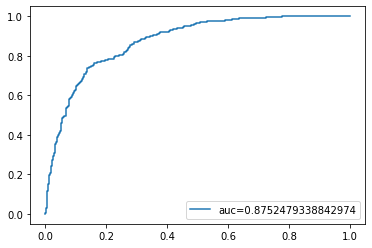

In [39]:
y_pred_proba = best_model.predict_proba(X_test_scaled)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.show()

### xgboost

In [41]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from xgboost import plot_importance
from copy import copy

In [42]:
# XGBoost doesn't (yet) handle categorical features automatically, so need to change
# them to columns of integer values.

## encode string class values as integers
# le = LabelEncoder()
# le = le.fit(df_model["category"])
# df_model["category"] = le.transform(df_model["category"])

# split data into X and Y
# X = df.iloc[:,1:10]
# Y = df.iloc[:,10]

## encode string class values as integers
# le = LabelEncoder()
# label_encoder = le.fit(Y)
# label_encoded_y = le.transform(Y)

#seed = 1234
#test_size = 0.20

# train/test split
#X_train, X_test, y_train, y_test =  train_test_split(X, Y, test_size=test_size, random_state=seed)

In [43]:
# fit model no training data
model = xgb.XGBClassifier()
model.fit(X_train, y_train)

print(model)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


In [44]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 85.17%


In [45]:
confusion_matrix(y_test, predictions)

array([[537,  68],
       [ 81, 319]])

In [46]:
print("Precision:",metrics.precision_score(y_test, predictions))
print("Recall:",metrics.recall_score(y_test, predictions))
print("f1-score:",2*metrics.precision_score(y_test, predictions)*metrics.recall_score(y_test, predictions)
      /(metrics.precision_score(y_test, predictions)+metrics.recall_score(y_test, predictions)))

Precision: 0.8242894056847545
Recall: 0.7975
f1-score: 0.8106734434561627


#### This is our best model: with accuracy of 85.17% and f1-score of 0.81

### verifying feature significance

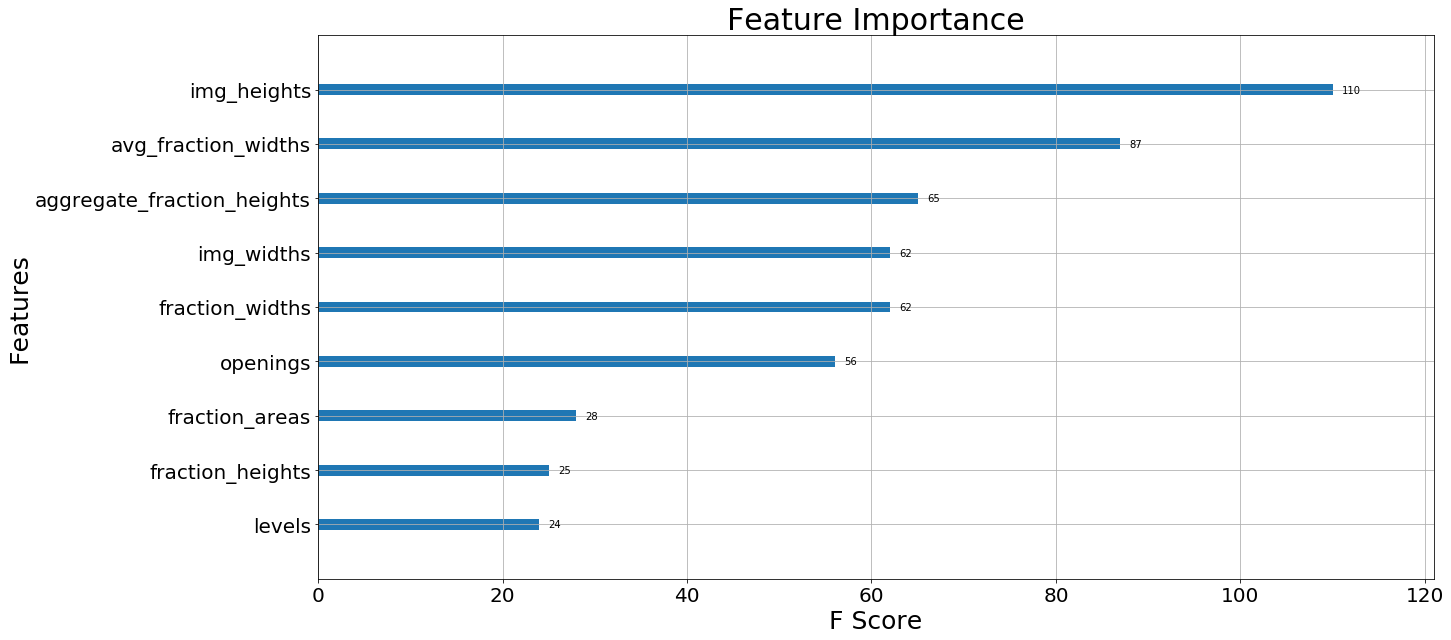

In [47]:
# feature importance use built-in XGBoost Feature Importance Plot
fig, ax = plt.subplots(1,1,figsize=(20,10))
xgb.plot_importance(model, ax=ax)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("F Score", fontsize=25)
plt.ylabel("Features", fontsize=25)
plt.title('Feature Importance', fontsize=30)
fig.savefig('featureInportance1.png')
plt.show()

### refit the logistic model: dropping the least important feature "levels"

In [48]:
df.drop(['levels'],axis=1)

,filename,openings,fraction_areas,fraction_widths,avg_fraction_widths,fraction_heights,aggregate_fraction_heights,img_widths,img_heights,Go/NoGo
0,1007,1.0,0.028925,0.096045,0.096045,0.407767,0.407767,531,206,1
1,1008,1.0,0.027588,0.105461,0.105461,0.432990,0.432990,531,194,1
2,1011,2.0,0.028925,0.167608,0.167608,0.461165,0.665049,531,206,1
3,1016,4.0,0.033021,0.269492,0.089831,0.336927,0.412399,590,371,1
4,1026,2.0,0.034910,0.133710,0.097928,0.410494,0.410494,531,324,1
...,...,...,...,...,...,...,...,...,...,...
8366,995,8.0,0.041276,0.440678,0.239407,0.336927,0.781671,472,371,0
8367,996,3.0,0.037436,0.244821,0.081607,0.377215,0.377215,531,395,0
8368,997,4.0,0.029841,0.204931,0.102465,0.386667,0.656667,649,300,0
8369,998,9.0,0.037436,0.355932,0.222850,0.387342,1.050633,531,395,0


In [49]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc [:, 1:9] , df['Go/NoGo'], test_size=0.12, random_state=0)
## normalizing the feature vectors
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = pd.DataFrame(scaler.transform(X_train))
X_test_scaled = pd.DataFrame(scaler.transform(X_test))

In [50]:
## hyperparameter tuning
logreg = LogisticRegression(solver = 'liblinear', class_weight = 'balanced')
# balanced weights for class imbalance
penalty = ['l1', 'l2']
C =np.logspace(-2, 4, 10)
hyperparameters = dict(C=C, penalty=penalty)

In [51]:
# Create grid search using 5-fold cross validation
clf = GridSearchCV(logreg, hyperparameters, cv=5, verbose=0)
best_model = clf.fit(X_train_scaled, y_train)

In [52]:
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

Best Penalty: l2
Best C: 0.046415888336127774


In [53]:
y_pred = best_model.predict(X_test_scaled)

In [54]:
print('Accuracy of logistic regression classifier on test set: {:.2f}%'.format(100*best_model.score(X_test_scaled, y_test)))

Accuracy of logistic regression classifier on test set: 79.00%


In [55]:
## Confustion Matrix
confusion_matrix(y_test, y_pred)

array([[479, 126],
       [ 85, 315]])

In [56]:
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("f1-score:",2*metrics.precision_score(y_test, y_pred)*metrics.recall_score(y_test, y_pred)
      /(metrics.precision_score(y_test, y_pred)+metrics.recall_score(y_test, y_pred)))

Precision: 0.7142857142857143
Recall: 0.7875
f1-score: 0.7491082045184304


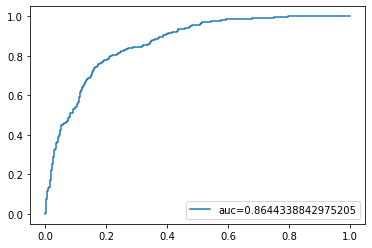

In [57]:
y_pred_proba = best_model.predict_proba(X_test_scaled)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.show()

#### As the accuracy and other metrics decreased significantly, we decided not to exclude any feature